<a href="https://colab.research.google.com/github/BenjaminGuerreroLewin/landslide_inventory/blob/main/code/LandslideInventory__Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#attach to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import Packages

!pip install rasterio
!pip install earthpy

from osgeo import gdal, gdal_array
import rasterio as rio
from rasterio.plot import show
import earthpy.plot as ep
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Use GDAL to import pre-processed rasters.

In [4]:
# Read Indices image stored on Google Drive
Indices = gdal.Open('/content/drive/MyDrive/EnvDatSci_FinalProject/Gorkha Landslides.tif', gdal.GA_ReadOnly)
NDVI = Indices.GetRasterBand(1).ReadAsArray().astype(float)
NDSI = Indices.GetRasterBand(2).ReadAsArray().astype(float)
ROG = Indices.GetRasterBand(3).ReadAsArray().astype(float)

Display Pre- and Post-Gorkha Earthquake Images

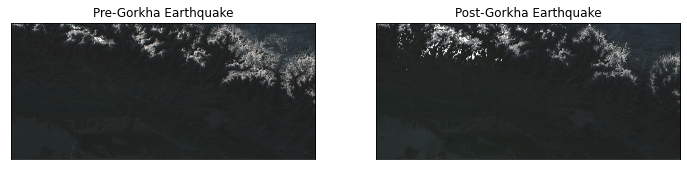

In [3]:
#There seems to be an error when exporting the images from Google Earth Engine - each is divided into two files. The figures below show one of those for each raster.
pre = rio.open('/content/drive/MyDrive/EnvDatSci_FinalProject/Pre-Gorkha Earthquake-0000000000-0000000000.tif').read() 
post = rio.open('/content/drive/MyDrive/EnvDatSci_FinalProject/Post-Gorkha Earthquake-0000000000-0000000000.tif').read()

fig, ax = plt.subplots(1,2,figsize=(20, 20))
ep.plot_rgb(
    pre,
    ax=ax[0],
    title="Pre-Gorkha Earthquake")
ep.plot_rgb(
    post,
    ax=ax[1],
    title="Post-Gorkha Earthquake")

plt.savefig('/content/drive/MyDrive/EnvDatSci_FinalProject/composites', bbox_inches='tight', facecolor='w');

Display Indices Image: Variation in NDVI, NDSI and ROG values on the Himalayas due to earthquake-induced landslides 

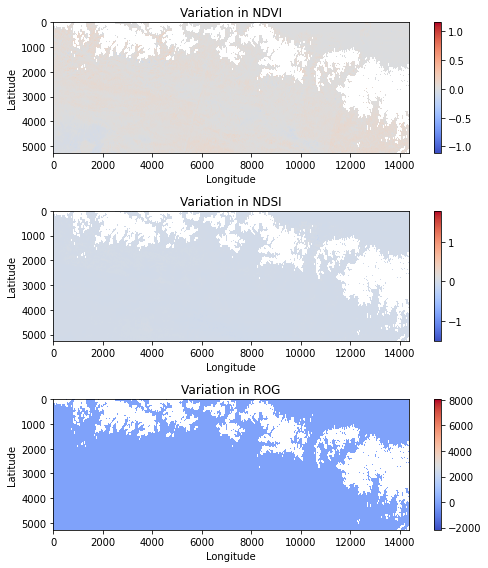

In [5]:
# Display Indices Image

fig, ax = plt.subplots(3,1);

im1 = ax[0].imshow(NDVI, cmap = 'coolwarm')
plt.colorbar(im1, ax=ax[0])
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Variation in NDVI')


im2 = ax[1].imshow(NDSI, cmap = 'coolwarm')
plt.colorbar(im2, ax=ax[1])
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_title('Variation in NDSI')


im3 = ax[2].imshow(ROG, cmap = 'coolwarm')
plt.colorbar(im3, ax=ax[2])
ax[2].set_xlabel('Longitude')
ax[2].set_ylabel('Latitude')
ax[2].set_title('Variation in ROG')


fig.set_size_inches(8, 8)
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/EnvDatSci_FinalProject/indices.png', bbox_inches='tight', facecolor='w');